# 一、数据采样

### 1.随机分割法

In [26]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

test_size = 0.33
seed = 15   # to get the same result, use fixed seed

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(random_state=seed)

model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)

print ('Accuracy is: %.3f%%') %(result*100)

Accuracy is: 74.803%


### 2.K折交叉验证

一般采用3折、5折、10折交叉验证，实际使用过程中是 10 * 10折，即每次10折，运行10次，也就是100个结果的平均值。

In [43]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

model = LogisticRegression()

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold)

print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Scores are: [ 0.7012987   0.81818182  0.74025974  0.71428571  0.77922078  0.75324675
  0.85714286  0.80519481  0.72368421  0.80263158]
Accuracy is : 76.951%, STD is :0.048


### 3.留一法验证

In [44]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

loo = model_selection.LeaveOneOut()

model = LogisticRegression()

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=loo)

#print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Accuracy is : 76.823%, STD is :0.422


### 4.多次随机分割法

In [45]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_splits = 10
splits = model_selection.ShuffleSplit(n_splits=num_splits, test_size=0.33, random_state=seed)

model = LogisticRegression()

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=splits)

print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Scores are: [ 0.7480315   0.75590551  0.7992126   0.76377953  0.77952756  0.76771654
  0.76377953  0.78740157  0.76377953  0.7519685 ]
Accuracy is : 76.811%, STD is :0.015


# 二、性能指标和度量方法

|Scoring|Function|Comment|
|:-------|:--------|:----------|
|**Classification**|	 	 
|‘accuracy’|metrics.accuracy_score|	 
|‘average_precision’|metrics.average_precision_score| 
|‘f1’	|metrics.f1_score|	for binary targets|
|‘f1_micro’|	metrics.f1_score|	micro-averaged|
|‘f1_macro’|	metrics.f1_score|	macro-averaged|
|‘f1_weighted’|	metrics.f1_score|	weighted average|
|‘f1_samples’|	metrics.f1_score|	by multilabel sample|
|‘neg_log_loss’|	metrics.log_loss|	requires predict_proba support|
|‘precision’ etc.|	metrics.precision_score|	suffixes apply as with ‘f1’|
|‘recall’ etc.|	metrics.recall_score|	suffixes apply as with ‘f1’
|‘roc_auc’|	metrics.roc_auc_score|
|**Clustering**	| 	 
|‘adjusted_mutual_info_score’|	metrics.adjusted_mutual_info_score|	 
|‘adjusted_rand_score’|	metrics.adjusted_rand_score|	 
|‘completeness_score’|	metrics.completeness_score|	 
|‘fowlkes_mallows_score’|	metrics.fowlkes_mallows_score|	 
|‘homogeneity_score’|	metrics.homogeneity_score|	 
|‘mutual_info_score’|	metrics.mutual_info_score|	 
|‘normalized_mutual_info_score’|	metrics.normalized_mutual_info_score|	 
|‘v_measure_score’|	metrics.v_measure_score	| 
|**Regression**|	 	 
|‘explained_variance’|	metrics.explained_variance_score|	 
|‘neg_mean_absolute_error’|	metrics.mean_absolute_error	|
|‘neg_mean_squared_error’|	metrics.mean_squared_error| 
|‘neg_mean_squared_log_error’|	metrics.mean_squared_log_error|	 
|‘neg_median_absolute_error’|	metrics.median_absolute_error|	 
|‘r2’|	metrics.r2_score|

## 分类指标

### 1.分类精确度

In [47]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

model = LogisticRegression()

scoring = 'accuracy'

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Scores are: [ 0.7012987   0.81818182  0.74025974  0.71428571  0.77922078  0.75324675
  0.85714286  0.80519481  0.72368421  0.80263158]
Accuracy is : 76.951%, STD is :0.048


### 2.对数损失

In [51]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

model = LogisticRegression()

scoring = 'neg_log_loss'

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print ('Scores are: %s') %(scores)
print ('Logloss is : %.3f, STD is :%.3f') %(scores.mean(), scores.std())

Scores are: [-0.57564876 -0.44405933 -0.52792964 -0.52759494 -0.51250102 -0.48984434
 -0.45147507 -0.40816584 -0.47043419 -0.51837365]
Logloss is : -0.493, STD is :0.047


### 3.ROC曲线下面积

In [53]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

model = LogisticRegression()

scoring = 'roc_auc'

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print ('Scores are: %s') %(scores)
print ('ROC_AUC is : %.3f, STD is :%.3f') %(scores.mean(), scores.std())

Scores are: [ 0.75625     0.8231405   0.82079343  0.7893617   0.79703704  0.83900709
  0.80272109  0.91153846  0.8661859   0.82898551]
ROC_AUC is : 0.824, STD is :0.041


### 4.混淆矩阵

In [56]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

test_size = 0.33
seed = 15   # to get the same result, use fixed seed

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(random_state=seed)

model.fit(X_train, Y_train)

result = model.predict(X_test)

matrix = metrics.confusion_matrix(Y_test, result)

print (matrix)

[[148  29]
 [ 35  42]]


### 5.分类报告

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

test_size = 0.33
seed = 15   # to get the same result, use fixed seed

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(random_state=seed)

model.fit(X_train, Y_train)

result = model.predict(X_test)

target_names = ['class 0', 'class 1']

report = metrics.classification_report(Y_test, result, target_names=target_names)

print (report)

             precision    recall  f1-score   support

        0.0       0.81      0.84      0.82       177
        1.0       0.59      0.55      0.57        77

avg / total       0.74      0.75      0.75       254



## 回归指标

### 1.绝对平均误差

In [80]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics

filename = 'Boston_Housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delimiter=',', header=1, names=names)

data_array = dataframe.values
X = data_array[:,0:13]
Y = data_array[:,13]

num_folders = 10
seed = 15   # to get the same result, use fixed seed

kfold = model_selection.KFold(n_splits=num_folders, random_state=seed)

scoring = 'neg_mean_absolute_error'
model = LinearRegression()
``
scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print (scores)

print ('Mean score is: %.3f , STD is %.3f') %(scores.mean(), scores.std())

[-2.14599703 -2.85271705 -2.96796682 -4.80947495 -3.98731406 -3.57831776
 -2.68416815 -9.64482619 -4.99512797 -2.5344678 ]
Mean score is -4.020 , STD is 2.083


http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.htmlhttp://datamining.dongguk.ac.kr/lectures/2009-2/dm/data/html/BostonHousing.html
    
The original data are 506 observations on 14 variables, medv being the target variable:
crim	per capita crime rate by town
zn	proportion of residential land zoned for lots over 25,000 sq.ft
indus	proportion of non-retail business acres per town
chas	Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox	nitric oxides concentration (parts per 10 million)
rm	average number of rooms per dwelling
age	proportion of owner-occupied units built prior to 1940
dis	weighted distances to five Boston employment centres
rad	index of accessibility to radial highways
tax	full-value property-tax rate per USD 10,000
ptratio	pupil-teacher ratio by town
b	1000(B - 0.63)^2 where B is the proportion of blacks by town
lstat	percentage of lower status of the population
medv	median value of owner-occupied homes in USD 1000's


### 2.均方误差

In [83]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


filename = 'Boston_Housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delimiter=',', header=1, names=names)

data_array = dataframe.values
X = data_array[:,0:13]
Y = data_array[:,13]

num_folders = 10
seed = 15   # to get the same result, use fixed seed

kfold = model_selection.KFold(n_splits=num_folders, random_state=seed)

scoring = 'neg_mean_squared_error'
model = LinearRegression()

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print (scores)

print ('Mean square score is: %.3f , STD is %.3f') %(scores.mean(), scores.std())

[  -8.70983468  -13.94827866  -15.27249078  -37.60234655  -30.67895992
  -19.92314843  -10.04657328 -167.98953108  -33.03993453  -10.93011923]
Mean square score is -34.814 , STD is 45.462


### 3.决定系数（R^2） 

In [86]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


filename = 'Boston_Housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delimiter=',', header=1, names=names)

data_array = dataframe.values
X = data_array[:,0:13]
Y = data_array[:,13]

num_folders = 10
seed = 15   # to get the same result, use fixed seed

kfold = model_selection.KFold(n_splits=num_folders, random_state=seed)

scoring = 'r2'
model = LinearRegression()

scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)

print (scores)

print ('Mean r2 score is: %.3f , STD is %.3f') %(scores.mean(), scores.std())

[ 0.74852635  0.48738272 -1.16842158  0.63102396  0.50001639  0.73259006
  0.37207724 -0.1266393  -0.75305547  0.42054937]
Mean r2 score is: 0.184 , STD is 0.625


# 三、模型比较

选择以下学习方法进行比较
- 逻辑回归
- 线性判别分析
- 支持向量机
- K近邻
- 朴素贝叶斯
- 分类回归树

LR
Scores are: [ 0.7012987   0.81818182  0.74025974  0.71428571  0.77922078  0.75324675
  0.85714286  0.80519481  0.72368421  0.80263158]
Mean accuracy is : 0.770, STD is :0.048
CART
Scores are: [ 0.64935065  0.79220779  0.64935065  0.5974026   0.71428571  0.7012987
  0.76623377  0.77922078  0.67105263  0.65789474]
Mean accuracy is : 0.698, STD is :0.061
SVM
Scores are: [ 0.58441558  0.71428571  0.55844156  0.61038961  0.64935065  0.61038961
  0.81818182  0.67532468  0.68421053  0.60526316]
Mean accuracy is : 0.651, STD is :0.072
KNN
Scores are: [ 0.63636364  0.83116883  0.7012987   0.63636364  0.71428571  0.75324675
  0.74025974  0.80519481  0.68421053  0.76315789]
Mean accuracy is : 0.727, STD is :0.062
LDA
Scores are: [ 0.7012987   0.83116883  0.75324675  0.67532468  0.77922078  0.76623377
  0.84415584  0.81818182  0.76315789  0.80263158]
Mean accuracy is : 0.773, STD is :0.052
NB
Scores are: [ 0.67532468  0.80519481  0.75324675  0.71428571  0.72727273  0.76623377
  0.80519481  0.81

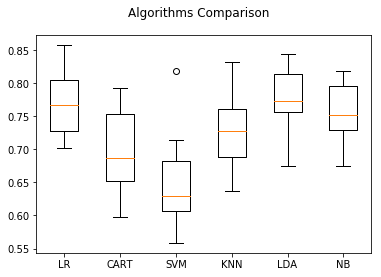

In [97]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import matplotlib.pyplot as plt

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

models = []
models.append(('LR',LogisticRegression()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

scoring = 'accuracy'
results = []
names = []
for name, model in models:
    scores = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    print name
    print ('Scores are: %s') %(scores)
    print ('Mean accuracy is : %.3f, STD is :%.3f') %(scores.mean(), scores.std())

fig = plt.figure()
fig.suptitle('Algorithms Comparison')
#fig.set_size_inches((12,12))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 四、机器学习流水线

### 1.数据准备和建模流水线

In [106]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn import feature_selection
from sklearn.decomposition import PCA

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

estimators = []
estimators.append(('standardize', pp.StandardScaler()))
estimators.append(('LR', LogisticRegression()))
pipe = Pipeline(estimators)

scores = model_selection.cross_val_score(estimator=pipe, X=X, y=Y, cv=kfold)

print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Scores are: [ 0.68831169  0.83116883  0.76623377  0.7012987   0.77922078  0.79220779
  0.84415584  0.83116883  0.76315789  0.80263158]
Accuracy is : 77.996%, STD is :0.050


### 2.特征选择和建模流水线

In [109]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.pipeline import FeatureUnion
from sklearn import feature_selection
from sklearn.decomposition import PCA

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, delimiter=',', header=None, names=names)

data_array = dataframe.values
X = data_array[:,0:8]
Y = data_array[:,8]

seed = 15   # to get the same result, use fixed seed
num_folder =10
kfold = model_selection.KFold(n_splits = num_folder, random_state=seed)

features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', feature_selection.SelectKBest( k=5)))
feature_union = FeatureUnion(features)

estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
pipe = Pipeline(estimators)

scores = model_selection.cross_val_score(estimator=pipe, X=X, y=Y, cv=kfold)

print ('Scores are: %s') %(scores)
print ('Accuracy is : %.3f%%, STD is :%.3f') %(scores.mean()*100, scores.std())

Scores are: [ 0.7012987   0.83116883  0.75324675  0.67532468  0.77922078  0.76623377
  0.84415584  0.81818182  0.76315789  0.80263158]
Accuracy is : 77.346%, STD is :0.052
